In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import Perceptron

# Descrição do dataset: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
# Caminho do dataset no Google Drive que será carregado em df
df = pd.read_csv("BreastCancerWisconsinDataSet.csv")

# Diagnosis (M = malignant, B = benign)
df.head()
df.tail()
df.info()
df.describe()
df.shape
df.isnull().sum()

ModuleNotFoundError: No module named 'seaborn'

## Pré-Processando os Dados

In [26]:
# Excluindo as variáveis id e Unnamed, pois são irrelevantes no contexto de informações
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)
df.shape

# Codificando a coluna de destino usando o codificador de rótulo - Transforma em 0 e 1 as Classes - Diagnosis (M = malignant = 1, B = benign = 0)
encoder = LabelEncoder()
df['diagnosis'] = encoder.fit_transform(df['diagnosis'])

X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# Normalizando os Dados
scaler = MinMaxScaler()
print(X)
X = scaler.fit_transform(X)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

<function matplotlib.pyplot.show(close=None, block=None)>

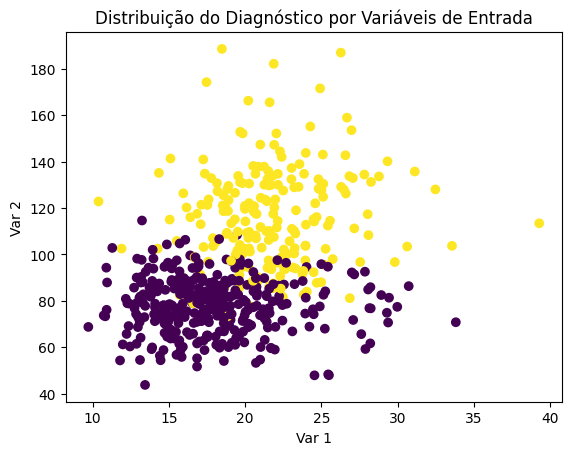

In [11]:
# plotando o gráfico para verificação da distribuição amostral das variáveis do dataset
X = df.iloc[:,:].values # transformando o df em ndarray para usar no scatter
pl = plt
pl.scatter(X[:,2],X[:,3],c=y)
pl.title("Distribuição do Diagnóstico por Variáveis de Entrada" )
pl.xlabel('Var 1')
pl.ylabel('Var 2')
pl.show

## Separando os Dados para Treinamento e Teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

p = Perceptron()
p.fit(X_train, y_train)

y_pred = p.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

## Apresentação das Métricas dos Testes Validados

In [277]:
test_score = accuracy_score(y_pred, y_test)
print("Acurácia dos testes: ", test_score)

print(classification_report(y_pred, y_test))

print("Número de épocas no treinamento: ", p.n_iter_)
print("Lista de parâmetros configurados na Perceptron: ", p.get_params())

Acurácia dos testes:  0.8508771929824561
              precision    recall  f1-score   support

           0       0.82      0.92      0.87        61
           1       0.89      0.77      0.83        53

    accuracy                           0.85       114
   macro avg       0.86      0.85      0.85       114
weighted avg       0.86      0.85      0.85       114

Número de épocas no treinamento:  19
Lista de parâmetros configurados na Perceptron:  {'alpha': 0.0001, 'class_weight': None, 'early_stopping': False, 'eta0': 1.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': None, 'random_state': 0, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
